In [28]:
import sys
import os
sys.path.append('..')
sys.path.index('..')

print(os.getcwd())

import matplotlib.pylab as plt
import numpy as np
import pathlib
import json
from torchvision.io import read_image
from PIL import Image
from load_aokvqa import load_dataset, get_coco_path
from gpt3.data import VisualReasoningDataset
# from IPython.display import Image, display

/mnt/lustre/share/lychen/code/sm/aokvqa/evaluation


In [29]:
# args
# dataset_name = 'vsr'
# split = 'test'
dataset_name = 'esnlive'
split = 'val'

# esnlive
prefixs = [
    'predictions/eve_val-da',
]

# # vsr
# prefixs = [
#     'predictions/vsr_fx_pc2a_eg0_f_2/epoch_0/test-da',
# ]

# # aokvqa
# prefixs = [
#     'predictions/fx_pc2a_eg0_f_1/epoch_2/val-da',
#     'predictions/fx_pc2a_perturb_answer_eg0_f_1/epoch_0/val-da',
# ]

# prefixs = ['predictions/fx_caption_eg0_f_epoch0_val-da', # for rationale exploration
#            'predictions/fx_rationale_eg0_f_epoch2_val-da',
#            'predictions/fx_pc2ra_epoch0_eg0_val-da',
#            'predictions/fx_pc2ra_longr_epoch0_eg0_val-da',
#            'predictions/fx_rationalization_ict_val-da', 
#            'predictions/fx_rationalization_epoch0_eg0_val-da']
# prefix = 'fx_rationale_eg0_f_epoch8_val'


data_dir = '../datasets/'
coco_path = os.path.join(data_dir, "coco")
prediction_files = ['../'+prefix+'.json' for prefix in prefixs]
ofa_prediction_file = f'../predictions/{dataset_name}_ofa_vqa_{split}-da.json'
blip_prediction_file = f'../predictions/{dataset_name}_blip_vqa_{split}-da.json'
ofa_caption_file = f'../predictions/{dataset_name}_ofa_caption_{split}-da.json'
blip_caption_file = f'../predictions/{dataset_name}_blip_caption_{split}-da.json'

# aokvqa_dir = './datasets/aokvqa/'
# prediction_file = './'+prefix+'.json'

In [30]:
# Read dataset
# dataset_list = load_dataset(data_dir, dataset_name=dataset_name, split=split)
dataset_list = VisualReasoningDataset(dataset_dir=data_dir, dataset_name=dataset_name, split=split, include_image=False)
dataset_dict = {item['question_id']: item for item in dataset_list}
question_ids = [item['question_id'] for item in dataset_list]

2023-01-18:23:44:52 | gpt3.data:line 82: Loading esnlive val dataset
2023-01-18:23:44:53 | gpt3.data:line 89: Loading dataset took 0.85 seconds


In [31]:
# Read predictions
predictions = [json.load(open(prediction_file, 'r')) for prediction_file in prediction_files]
ofa_predictions = json.load(open(ofa_prediction_file, 'r'))
blip_predictions = json.load(open(blip_prediction_file, 'r'))
ofa_captions = json.load(open(ofa_caption_file, 'r'))
blip_captions = json.load(open(blip_caption_file, 'r'))

In [32]:
import matplotlib.patches as patches


def show_images(images, nrow=3, scale=6):
    if len(images.shape) == 4 and images.shape[0] == 1:
        images = images[0]
    if len(images.shape) == 3:
        fig, ax = plt.subplots()
        ax.set_xticklabels([])
        ax.set_yticklabels([])    
        ax.imshow(images)
        plt.show()
    else:
        n = images.shape[0]
        ncol = (n + nrow - 1) // nrow
        if ncol == 1:
            nrow = min(nrow, n)
        fig, axes = plt.subplots(ncol, nrow, sharex=True, sharey=True, figsize=(scale*nrow, scale*ncol))
        if ncol > 1:
            axes = [item for rows in axes for item in rows]
        i = 0
        for ax, im in zip(axes, images):
            ax.imshow(im)
            ax.set_xticklabels([])
            ax.set_yticklabels([])
        fig.subplots_adjust(wspace=0, hspace=0)
        fig.show()

======================================== 2518219912.jpg#0r1c ========================================
========== question_id (GT) ==========
2518219912.jpg#0r1c
========== image_id (GT) ==========
2518219912.jpg
========== question (GT) ==========
 does the image describe " A girl is sleeping " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['The little girl cannot be  holding up a yellow water hose if she is sleeping.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/2518219912.jpg
==================== OFA caption ====================
 a young girl pours water from a hose onto a dog.
==================== BLIP caption ====================
a little girl is playing with a hosepiper
==================== OFA prediction ====================
 no
==================== BLIP prediction ====================
no
####################

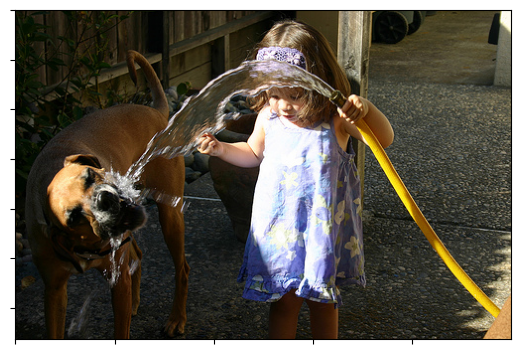

======================================== 6813821371.jpg#3r1c ========================================
========== question_id (GT) ==========
6813821371.jpg#3r1c
========== image_id (GT) ==========
6813821371.jpg
========== question (GT) ==========
 does the image describe " A man puts makeup on himself " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
["A man doesn't mean a make up artist and powdering himself is different from powdering a female"]
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/6813821371.jpg
==================== OFA caption ====================
 person sits in a chair and talks into a microphone.
==================== BLIP caption ====================
a woman is getting her hair done by a hairdresser
==================== OFA prediction ====================
 no man puts makeup on himself this imply the f

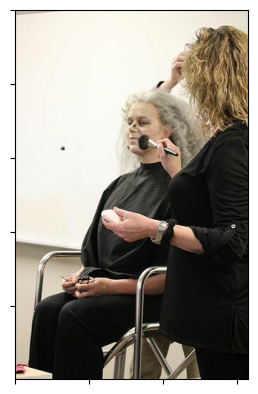

======================================== 1693120546.jpg#2r4n ========================================
========== question_id (GT) ==========
1693120546.jpg#2r4n
========== image_id (GT) ==========
1693120546.jpg
========== question (GT) ==========
 does the image describe " The woman is watching TV " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
maybe
1
========== mc_answer (GT) ==========
maybe
========== rationales (GT) ==========
['Though she appears to be watching something, it is unclear if it is TV.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/1693120546.jpg
==================== OFA caption ====================
 a woman with brown hair and a grey sweatshirt sits at a bar and knits a
==================== BLIP caption ====================
a woman sitting at a table with a bag of yarn
==================== OFA prediction ====================
 no woman is watching television
===================

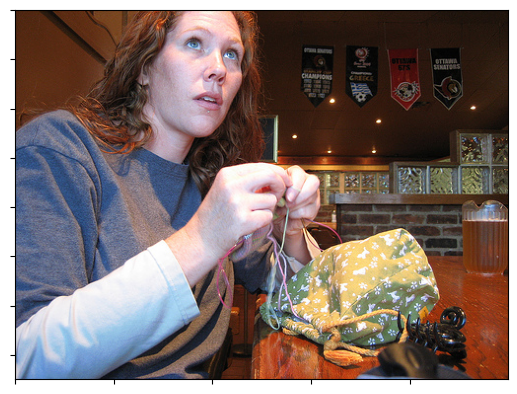

======================================== 2702506716.jpg#1r1c ========================================
========== question_id (GT) ==========
2702506716.jpg#1r1c
========== image_id (GT) ==========
2702506716.jpg
========== question (GT) ==========
 does the image describe " a dog sleeping in the wood " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['The dog can either be crawling or sleeping.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/2702506716.jpg
==================== OFA caption ====================
 dog hiding under the stairs
==================== BLIP caption ====================
a dog is sitting on the stairs of a staircase
==================== OFA prediction ====================
 yes
==================== BLIP prediction ====================
no
#################### predictions/eve_val-da prediction #######

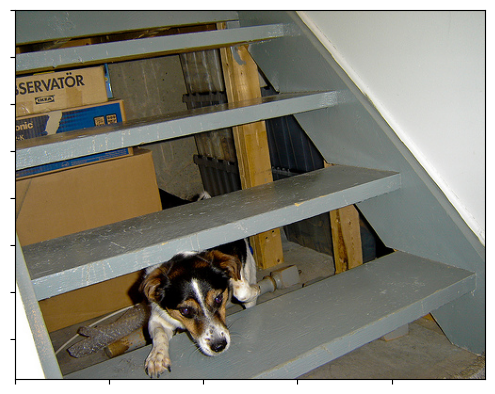

======================================== 356841528.jpg#0r1c ========================================
========== question_id (GT) ==========
356841528.jpg#0r1c
========== image_id (GT) ==========
356841528.jpg
========== question (GT) ==========
 does the image describe " Three men are playing a game of basketball " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['Two men cannot be three men.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/356841528.jpg
==================== OFA caption ====================
 men playing traditional music on the roof of a house, ouidah, benin,
==================== BLIP caption ====================
a group of men in traditional costumes playing drums
==================== OFA prediction ====================
 no
==================== BLIP prediction ====================
no
##################

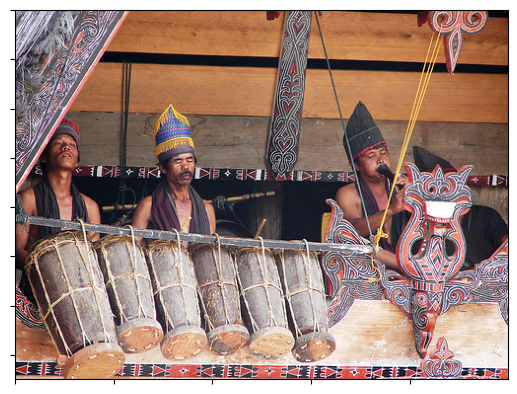

======================================== 3060594966.jpg#2r1c ========================================
========== question_id (GT) ==========
3060594966.jpg#2r1c
========== image_id (GT) ==========
3060594966.jpg
========== question (GT) ==========
 does the image describe " A boy is running from a deranged clown in a department store " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['A boy cannot both be walking outdoors and running in a department store.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/3060594966.jpg
==================== OFA caption ====================
 a photo documentary series of mexico's transgendered zapotecs involvement
==================== BLIP caption ====================
a young boy in a blue shirt and black pants
==================== OFA prediction ====================
 no
=================

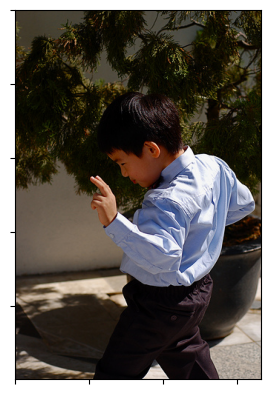

======================================== 336460583.jpg#1r1n ========================================
========== question_id (GT) ==========
336460583.jpg#1r1n
========== image_id (GT) ==========
336460583.jpg
========== question (GT) ==========
 does the image describe " puppy running after a stick in gras " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
maybe
1
========== mc_answer (GT) ==========
maybe
========== rationales (GT) ==========
['The puppy appears to be running in the grass, but it could be towards anything. No sign of a stick in view']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/336460583.jpg
==================== OFA caption ====================
 a coyote is seen in this undated file photo. (credit: ktla
==================== BLIP caption ====================
a dog running through the grass in a field
==================== OFA prediction ====================
 yes
==================== 

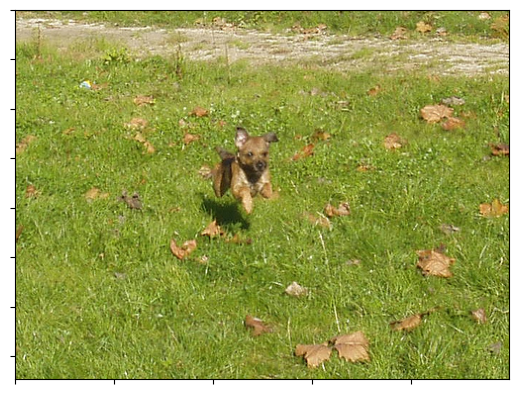

======================================== 3288596188.jpg#1r1e ========================================
========== question_id (GT) ==========
3288596188.jpg#1r1e
========== image_id (GT) ==========
3288596188.jpg
========== question (GT) ==========
 does the image describe " Two men are near the water " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
yes
0
========== mc_answer (GT) ==========
yes
========== rationales (GT) ==========
['If you stand near the shore you are near the water.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/3288596188.jpg
==================== OFA caption ====================
 men look at a cruise ship in the port of haifa, israel.
==================== BLIP caption ====================
two men standing in front of a cruise ship
==================== OFA prediction ====================
 men are near the water
==================== BLIP prediction ====================
no
########

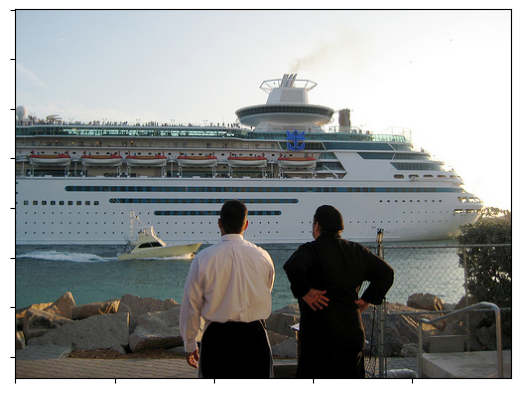

======================================== 533854547.jpg#3r1c ========================================
========== question_id (GT) ==========
533854547.jpg#3r1c
========== image_id (GT) ==========
533854547.jpg
========== question (GT) ==========
 does the image describe " some kids are at a movi " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['A park is not a movie.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/533854547.jpg
==================== OFA caption ====================
 children chasing ducks along a path in a park
==================== BLIP caption ====================
a group of people walking down a path with ducks
==================== OFA prediction ====================
 no
==================== BLIP prediction ====================
no
#################### predictions/eve_val-da prediction ###############

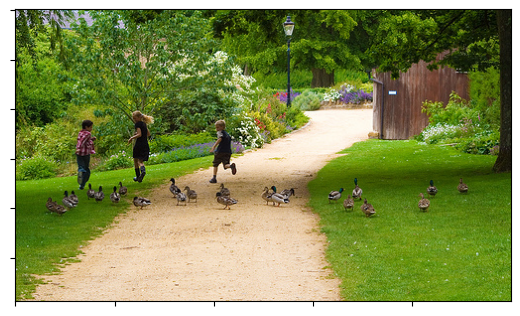

======================================== 129602216.jpg#0r2c ========================================
========== question_id (GT) ==========
129602216.jpg#0r2c
========== image_id (GT) ==========
129602216.jpg
========== question (GT) ==========
 does the image describe " A man drives his car to the local restaurant " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['EITHER HE IS SITTING OR HE DRIVES']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/129602216.jpg
==================== OFA caption ====================
 a man in a red sweater sits at a table with a glass of water in front of
==================== BLIP caption ====================
a man sitting at a table with a glass of water
==================== OFA prediction ====================
 no
==================== BLIP prediction ====================
no
#############

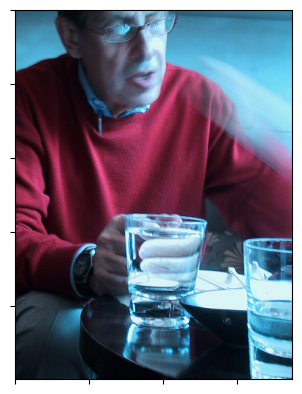

======================================== 6147735412.jpg#3r1n ========================================
========== question_id (GT) ==========
6147735412.jpg#3r1n
========== image_id (GT) ==========
6147735412.jpg
========== question (GT) ==========
 does the image describe " The friends were catching up with each other " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
maybe
1
========== mc_answer (GT) ==========
maybe
========== rationales (GT) ==========
['Two men and a woman are talking among each other, and they may be friends.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/6147735412.jpg
==================== OFA caption ====================
 a conversation between a man and a woman
==================== BLIP caption ====================
a man and woman standing in a courtroom
==================== OFA prediction ====================
 no friends were catching up with each other
==================== 

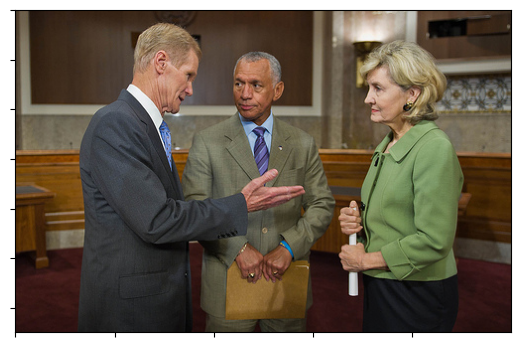

======================================== 157875980.jpg#0r1n ========================================
========== question_id (GT) ==========
157875980.jpg#0r1n
========== image_id (GT) ==========
157875980.jpg
========== question (GT) ==========
 does the image describe " A man entertaining others outside " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
yes
0
========== mc_answer (GT) ==========
yes
========== rationales (GT) ==========
['A man is playing a musical instrument, entertaining outside.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/157875980.jpg
==================== OFA caption ====================
 man playing accordion on the street
==================== BLIP caption ====================
a man in a hat and a bicycle
==================== OFA prediction ====================
 yes
==================== BLIP prediction ====================
no
#################### predictions/eve_val-da predi

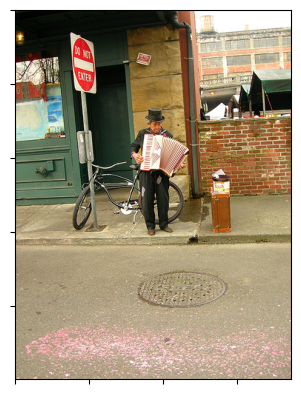

======================================== 1301140633.jpg#3r1c ========================================
========== question_id (GT) ==========
1301140633.jpg#3r1c
========== image_id (GT) ==========
1301140633.jpg
========== question (GT) ==========
 does the image describe " The boy has a clean face " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['Dirty verses clean.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/1301140633.jpg
==================== OFA caption ====================
 a boy covered in mud
==================== BLIP caption ====================
a young boy with a bottle of chili sauce
==================== OFA prediction ====================
 no
==================== BLIP prediction ====================
no
#################### predictions/eve_val-da prediction ####################
no


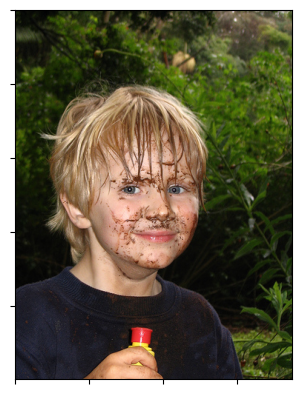

======================================== 3429236278.jpg#1r1n ========================================
========== question_id (GT) ==========
3429236278.jpg#1r1n
========== image_id (GT) ==========
3429236278.jpg
========== question (GT) ==========
 does the image describe " Two musicians are completely out of tune " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
maybe
1
========== mc_answer (GT) ==========
maybe
========== rationales (GT) ==========
['The picture shows two musicians, one on piano, one on a wind instrument, however it cannot be determined from the picture whether or not they are in tune or not.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/3429236278.jpg
==================== OFA caption ====================
 person plays the piano with person.
==================== BLIP caption ====================
a man and woman playing music in a room
==================== OFA prediction =========

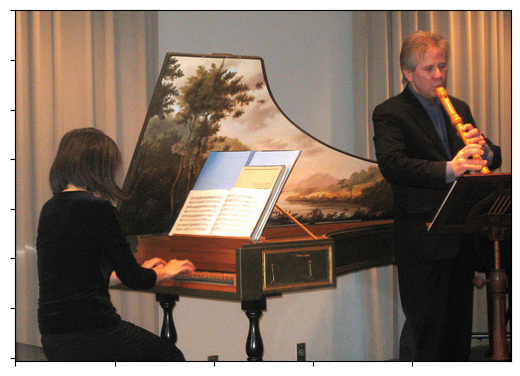

======================================== 4033018747.jpg#2r1c ========================================
========== question_id (GT) ==========
4033018747.jpg#2r1c
========== image_id (GT) ==========
4033018747.jpg
========== question (GT) ==========
 does the image describe " A man sprinting through a library " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['SPRINTING CANNOT BE DONE BY A WHEELCHAIR']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/4033018747.jpg
==================== OFA caption ====================
 person in a wheelchair in front of bookshelves
==================== BLIP caption ====================
a man in a wheelchair wheel chair in a library
==================== OFA prediction ====================
 yes
==================== BLIP prediction ====================
no
#################### predictions/eve_v

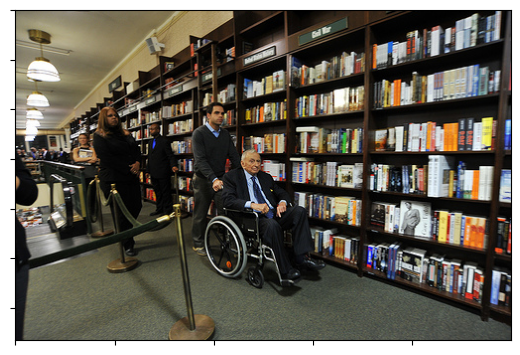

======================================== 4814731415.jpg#4r1e ========================================
========== question_id (GT) ==========
4814731415.jpg#4r1e
========== image_id (GT) ==========
4814731415.jpg
========== question (GT) ==========
 does the image describe " People are outside in the par " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
yes
0
========== mc_answer (GT) ==========
yes
========== rationales (GT) ==========
['Riding bikes implies outside.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/4814731415.jpg
==================== OFA caption ====================
 a city made by people amersfoort netherlands city guide
==================== BLIP caption ====================
a group of people riding bicycles down a street
==================== OFA prediction ====================
 yes
==================== BLIP prediction ====================
no
#################### predictions/eve_val-

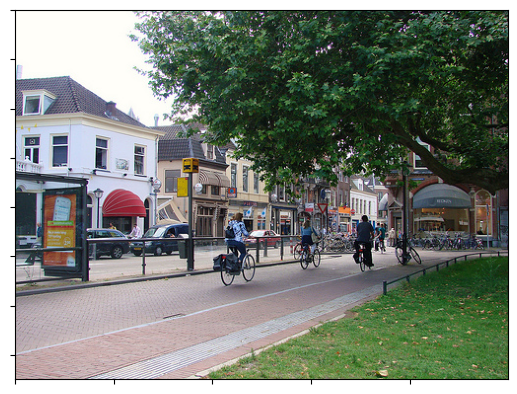

======================================== 2809396455.jpg#3r1n ========================================
========== question_id (GT) ==========
2809396455.jpg#3r1n
========== image_id (GT) ==========
2809396455.jpg
========== question (GT) ==========
 does the image describe " A man is watching his wife " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
maybe
1
========== mc_answer (GT) ==========
maybe
========== rationales (GT) ==========
['There is no indication that either of the women pictured are his wife, he could be married to someone else.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/2809396455.jpg
==================== OFA caption ====================
 a scene from the horror movie the purge: anarchy
==================== BLIP caption ====================
a man in a white shirt is holding a bat bat
==================== OFA prediction ====================
 yes
==================== BLIP predicti

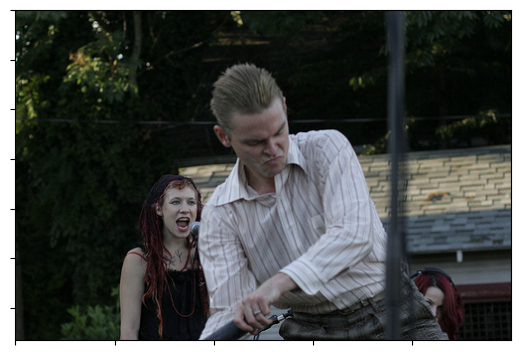

======================================== 7682324722.jpg#1r1n ========================================
========== question_id (GT) ==========
7682324722.jpg#1r1n
========== image_id (GT) ==========
7682324722.jpg
========== question (GT) ==========
 does the image describe " The basketball player is taking a foul shot " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
maybe
1
========== mc_answer (GT) ==========
maybe
========== rationales (GT) ==========
['The basketball player could be shooting the ball in his hands for other reasons.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/7682324722.jpg
==================== OFA caption ====================
 basketball shooting guard warms up before the game against sports team.
==================== BLIP caption ====================
a man in a red shirt is playing basketball
==================== OFA prediction ====================
 yes
==================== B

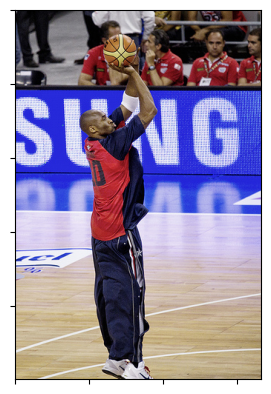

======================================== 4107795952.jpg#1r1c ========================================
========== question_id (GT) ==========
4107795952.jpg#1r1c
========== image_id (GT) ==========
4107795952.jpg
========== question (GT) ==========
 does the image describe " A man is skateboardin " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['Skateboarding is not the same as snowboard.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/4107795952.jpg
==================== OFA caption ====================
 olympic athlete on his way to winning the gold medal in the men's final
==================== BLIP caption ====================
a snowboarder is jumping over a box of snow
==================== OFA prediction ====================
 no
==================== BLIP prediction ====================
no
#################### predi

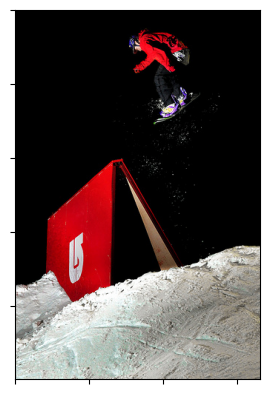

======================================== 3597007663.jpg#3r1c ========================================
========== question_id (GT) ==========
3597007663.jpg#3r1c
========== image_id (GT) ==========
3597007663.jpg
========== question (GT) ==========
 does the image describe " The child is in the barn " ?
========== choices (GT) ==========
['yes', 'maybe', 'no']
========== correct_choice_idx (GT) ==========
no
2
========== mc_answer (GT) ==========
no
========== rationales (GT) ==========
['The child is either in water or in the barn.']
========== image_path (GT) ==========
../datasets/esnlive/flickr30k_images/3597007663.jpg
==================== OFA caption ====================
 a boy splashes in a fountain of water.
==================== BLIP caption ====================
a man is playing with a water hose in the water
==================== OFA prediction ====================
 no
==================== BLIP prediction ====================
no
#################### predictions/eve_val-da predict

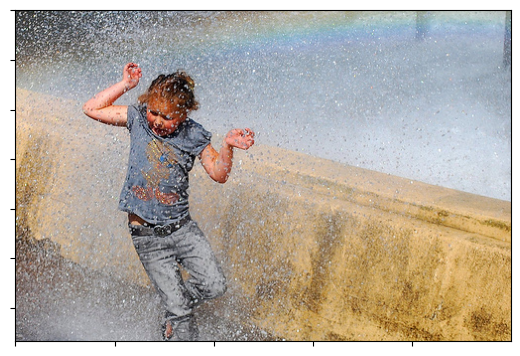

In [35]:
print_different_predictions_only = True

# for qid in question_ids[:100]:
for qid in question_ids[200:220]:
# for qid in question_ids[-100:]:
    
    if print_different_predictions_only:
        # select qid if predictions are different 
        prediction_dict = {}
        for prefix, prediction in zip(prefixs, predictions):
            
            # if prefix == 'predictions/fx_pc2a_eg0_f_1/epoch_2/val-da' and prediction[qid] != dataset_dict[qid]['choices'][dataset_dict[qid]['correct_choice_idx']]:
            #     continue       
            prediction_dict[prediction[qid]] = ''
        # check if everying in the list is the same
        # if len(prediction_dict.keys()) == 1:
        #     continue
        # if 'no' in blip_predictions[qid]:
        #     print('skip')
        #     continue
        
    print('='*40, qid, '='*40)
    question_setting = dataset_dict[qid]
    for k in question_setting:
        print('='*10, k, '(GT)', '='*10)
        if k == 'correct_choice_idx':
            print(question_setting['choices'][question_setting[k]])
        print(question_setting[k])
    print('='*20, 'OFA caption', '='*20)
    print(ofa_captions[qid])
    print('='*20, 'BLIP caption', '='*20)
    print(blip_captions[qid])
    print('='*20, 'OFA prediction', '='*20)
    print(ofa_predictions[qid])
    print('='*20, 'BLIP prediction', '='*20)
    print(blip_predictions[qid])
    for prefix, prediction in zip(prefixs, predictions):
        print('#'*20, prefix, 'prediction', '#'*20)
        print(prediction[qid])
    # image_path = get_coco_path(split, question_setting["image_id"], coco_path)
    image_path = question_setting["image_path"]
    with Image.open(image_path) as img:
        image = np.array(img.convert("RGB"))
    show_images(image)